In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import geopandas as gpd
import contextily as ctx

In [41]:
world_gdf = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world_gdf

C:\Users\91702\AppData\Local\Temp\ipykernel_18024\1073908710.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_gdf = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [42]:
world_gdf.crs 

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [43]:

#caluclate popluation density
world_gdf['pop_density'] = world_gdf.pop_est/ world_gdf.area * 10**6

world_gdf.sort_values(by='pop_density',ascending=False)

C:\Users\91702\AppData\Local\Temp\ipykernel_18024\4108466449.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  world_gdf['pop_density'] = world_gdf.pop_est/ world_gdf.area * 10**6


,pop_est,continent,name,iso_a3,gdp_md_est,geometry,pop_density
99,163046161.0,Asia,Bangladesh,BGD,302571,"POLYGON ((92.67272 22.04124, 92.65226 21.32405...",1.375084e+13
79,4685306.0,Asia,Palestine,PSE,16276,"POLYGON ((35.39756 31.48909, 34.92741 31.35344...",9.754682e+12
140,23568378.0,Asia,Taiwan,TWN,1127000,"POLYGON ((121.77782 24.39427, 121.17563 22.790...",7.744572e+12
77,6855713.0,Asia,Lebanon,LBN,51991,"POLYGON ((35.82110 33.27743, 35.55280 33.26427...",6.968534e+12
169,12626950.0,Africa,Rwanda,RWA,10354,"POLYGON ((30.41910 -1.13466, 30.81613 -1.69891...",6.647863e+12
...,...,...,...,...,...,...,...
144,361313.0,Europe,Iceland,ISL,24188,"POLYGON ((-14.50870 66.45589, -14.73964 65.808...",1.756569e+10
20,3398.0,South America,Falkland Is.,FLK,282,"POLYGON ((-61.20000 -51.85000, -60.00000 -51.2...",1.596242e+09
23,140.0,Seven seas (open ocean),Fr. S. Antarctic Lands,ATF,16,"POLYGON ((68.93500 -48.62500, 69.58000 -48.940...",9.770204e+07
22,56225.0,North America,Greenland,GRL,3051,"POLYGON ((-46.76379 82.62796, -43.40644 83.225...",8.298776e+07


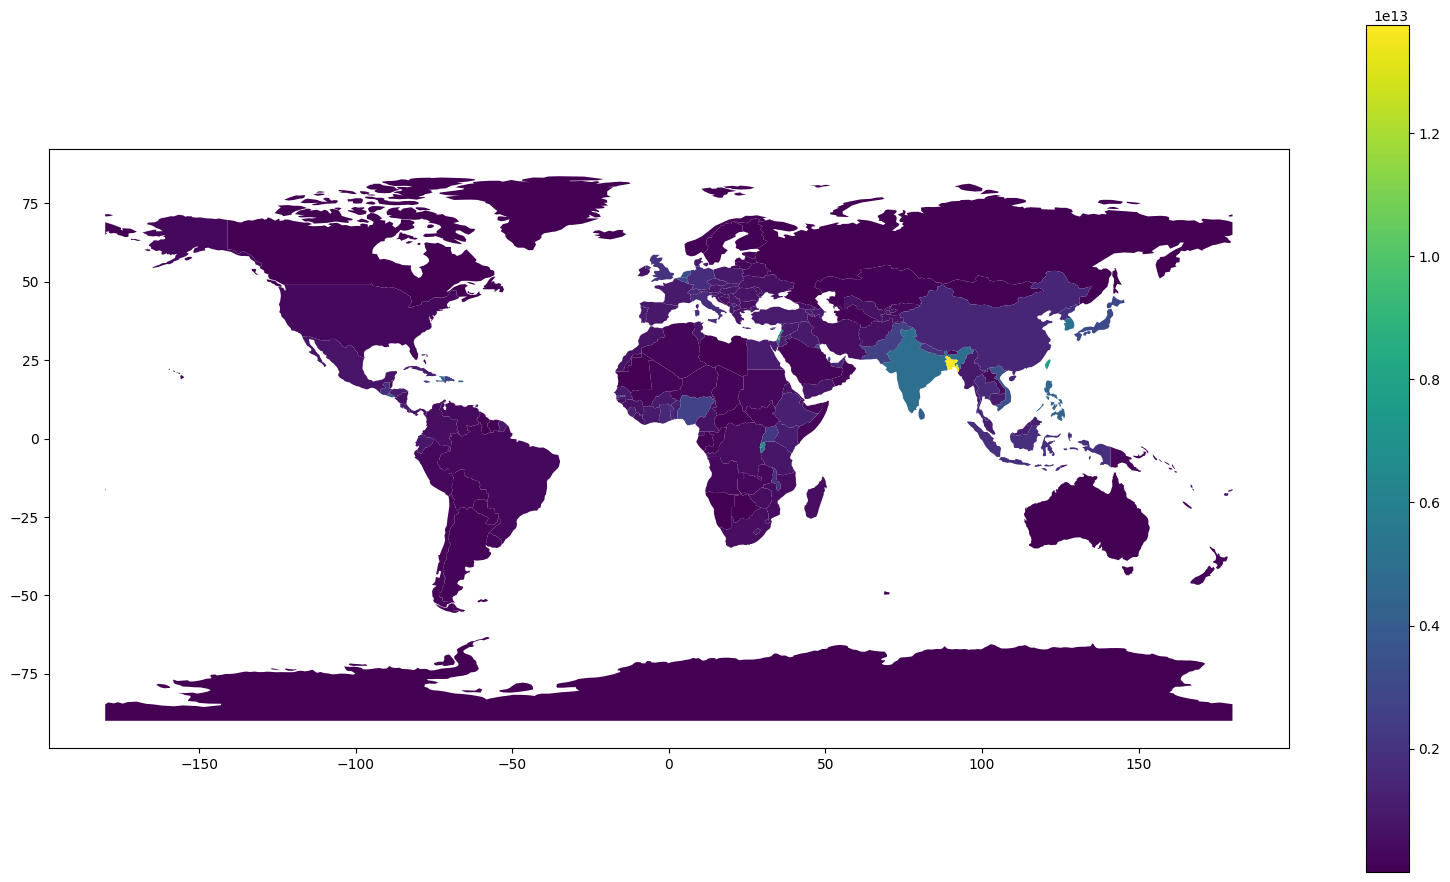

In [44]:
figsize=(20,11)
world_gdf.plot('pop_density',legend=True,figsize=figsize);

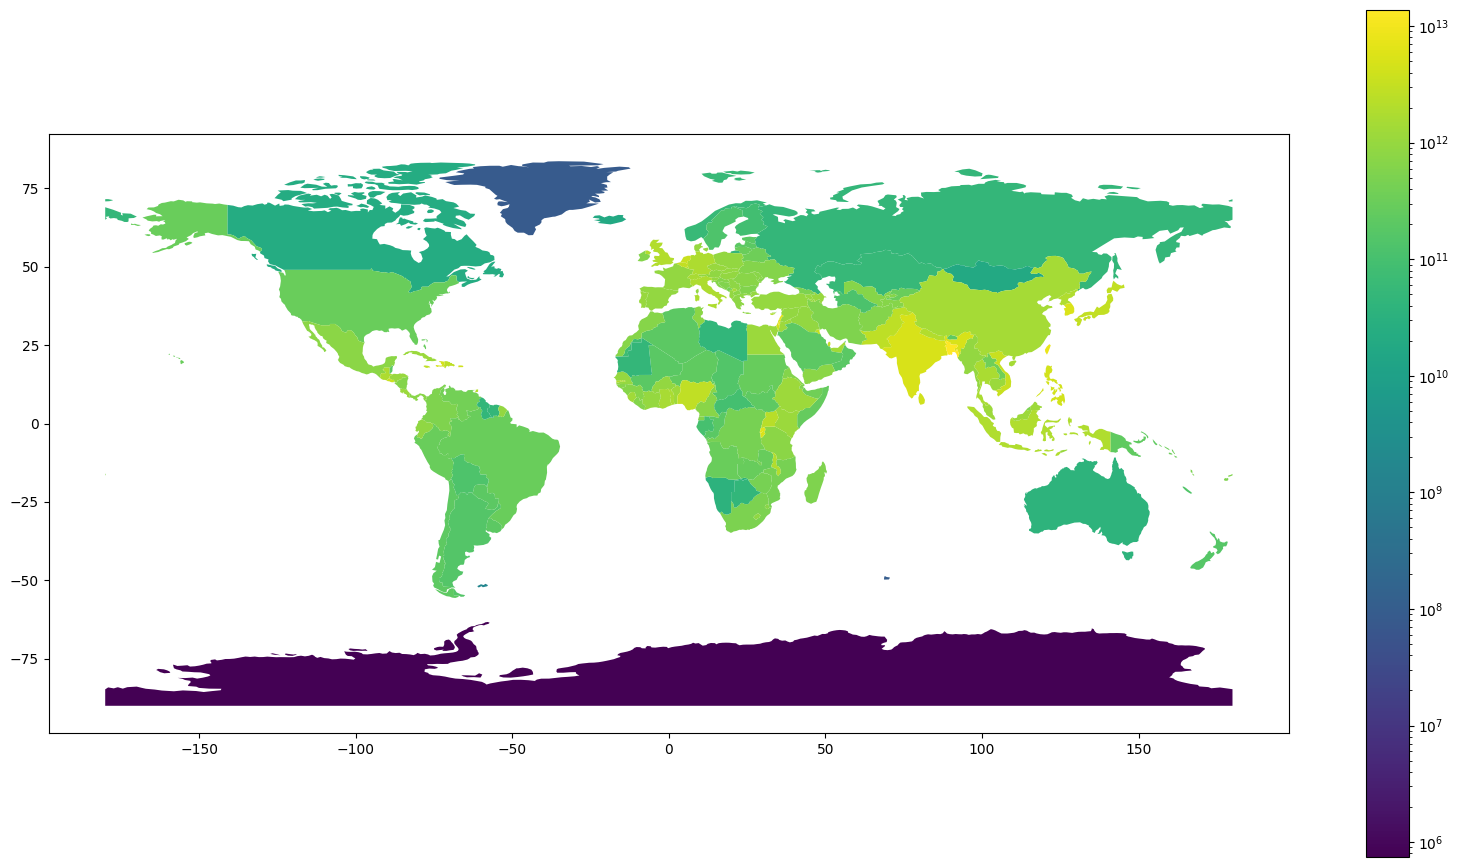

In [45]:
norm = matplotlib.colors.LogNorm(vmin=world_gdf.pop_density.min(),vmax=world_gdf.pop_density.max())
world_gdf.to_crs('epsg:4326').plot("pop_density",
                                   figsize=figsize,
                                   legend=True,
                                   norm=norm);

In [46]:
deaths_df = gpd.read_file('SnowGIS\Cholera_Deaths.shp')
pumps_df = gpd.read_file('SnowGIS\Pumps.shp')

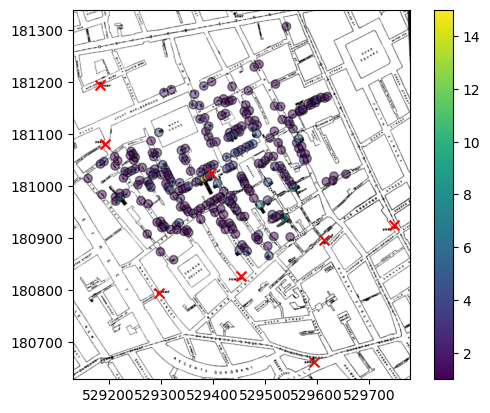

In [47]:
ax=deaths_df.plot(column='Count',alpha=0.5,edgecolor='k',legend=True)
pumps_df.plot(ax=ax,marker='x',color='red',markersize=50)
ctx.add_basemap(ax,crs=deaths_df.crs.to_string(),
                source="SnowGIS/SnowMap.tif")

In [48]:
gdf_district = gpd.read_file('D:\Progrmming\Python\Advance\Graphs\geopandas\District')
gdf_district.head(5)

,KGISDistri,LGD_Distri,KGISDist_1,BhuCodeDis,created_us,created_da,last_edite,last_edi_1,SHAPE_STAr,SHAPE_STLe,geometry
0,01,527,Belagavi,01,None,None,SURESHBV1,2022-11-24,1.339772e+10,1.141488e+06,"MULTIPOLYGON (((537523.310 1865366.861, 537555..."
1,02,524,Bagalkot,02,None,None,SURESHBV1,2022-09-08,6.561826e+09,6.682456e+05,"POLYGON ((581917.898 1811433.959, 581946.875 1..."
2,03,530,Vijayapura,03,None,None,SURESHBV1,2022-11-24,1.050271e+10,7.032618e+05,"POLYGON ((537523.310 1865366.861, 537516.168 1..."
3,04,538,Kalburgi,04,None,None,SURESHBV1,2022-11-09,1.097395e+10,9.181459e+05,"MULTIPOLYGON (((680992.661 1951255.947, 681227..."
4,05,529,Bidar,05,None,None,SURESHBV1,2022-11-16,5.454415e+09,5.733925e+05,"MULTIPOLYGON (((766506.612 1970249.909, 766481..."


<Axes: >

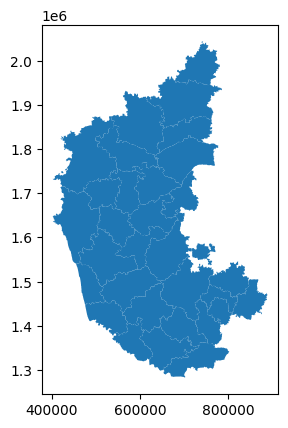

In [49]:
gdf_district.plot()

In [50]:
df = pd.read_csv("Karnataka-DistPop1.csv")
df.head()

,District,population
0,Bagalkot,83973
1,Bidar,59898
2,Bangalore Rural,17931
3,Bangalore Urban,414125
4,Belagavi,100481


In [51]:
gdf_merged = gdf_district.merge(df,left_on='KGISDist_1',right_on='District',how='left')
gdf_merged.head()

,KGISDistri,LGD_Distri,KGISDist_1,BhuCodeDis,created_us,created_da,last_edite,last_edi_1,SHAPE_STAr,SHAPE_STLe,geometry,District,population
0,01,527,Belagavi,01,None,None,SURESHBV1,2022-11-24,1.339772e+10,1.141488e+06,"MULTIPOLYGON (((537523.310 1865366.861, 537555...",Belagavi,100481.0
1,02,524,Bagalkot,02,None,None,SURESHBV1,2022-09-08,6.561826e+09,6.682456e+05,"POLYGON ((581917.898 1811433.959, 581946.875 1...",Bagalkot,83973.0
2,03,530,Vijayapura,03,None,None,SURESHBV1,2022-11-24,1.050271e+10,7.032618e+05,"POLYGON ((537523.310 1865366.861, 537516.168 1...",Vijayapura,80958.0
3,04,538,Kalburgi,04,None,None,SURESHBV1,2022-11-09,1.097395e+10,9.181459e+05,"MULTIPOLYGON (((680992.661 1951255.947, 681227...",Kalburgi,141884.0
4,05,529,Bidar,05,None,None,SURESHBV1,2022-11-16,5.454415e+09,5.733925e+05,"MULTIPOLYGON (((766506.612 1970249.909, 766481...",Bidar,59898.0


0     481044.216974
1     566817.991905
2     601533.003205
3     698694.112020
4     735632.988976
5     702488.921998
6     630990.358209
7     571368.006825
8     516342.125164
9     459047.256656
10    544827.677779
11    694243.636854
12    663492.776275
13    601924.757181
14    523863.587661
15    486203.961489
16    574646.109165
17    710629.514082
18    848910.180402
19    781437.511591
20    778956.265797
21    695324.192584
22    620128.847889
23    527231.020929
24    586925.569147
25    656744.795687
26    728236.987971
27    806855.988996
28    753683.617723
29    703986.430838
30    627775.401493
dtype: float64
0     1.782372e+06
1     1.793496e+06
2     1.857111e+06
3     1.909347e+06
4     1.986326e+06
5     1.779942e+06
6     1.720870e+06
7     1.706114e+06
8     1.701480e+06
9     1.635298e+06
10    1.629487e+06
11    1.688553e+06
12    1.566853e+06
13    1.582072e+06
14    1.552520e+06
15    1.492159e+06
16    1.487451e+06
17    1.495617e+06
18    1.454793e+06
19  

Text(467.4108612440725, 0.5, 'Latitude')

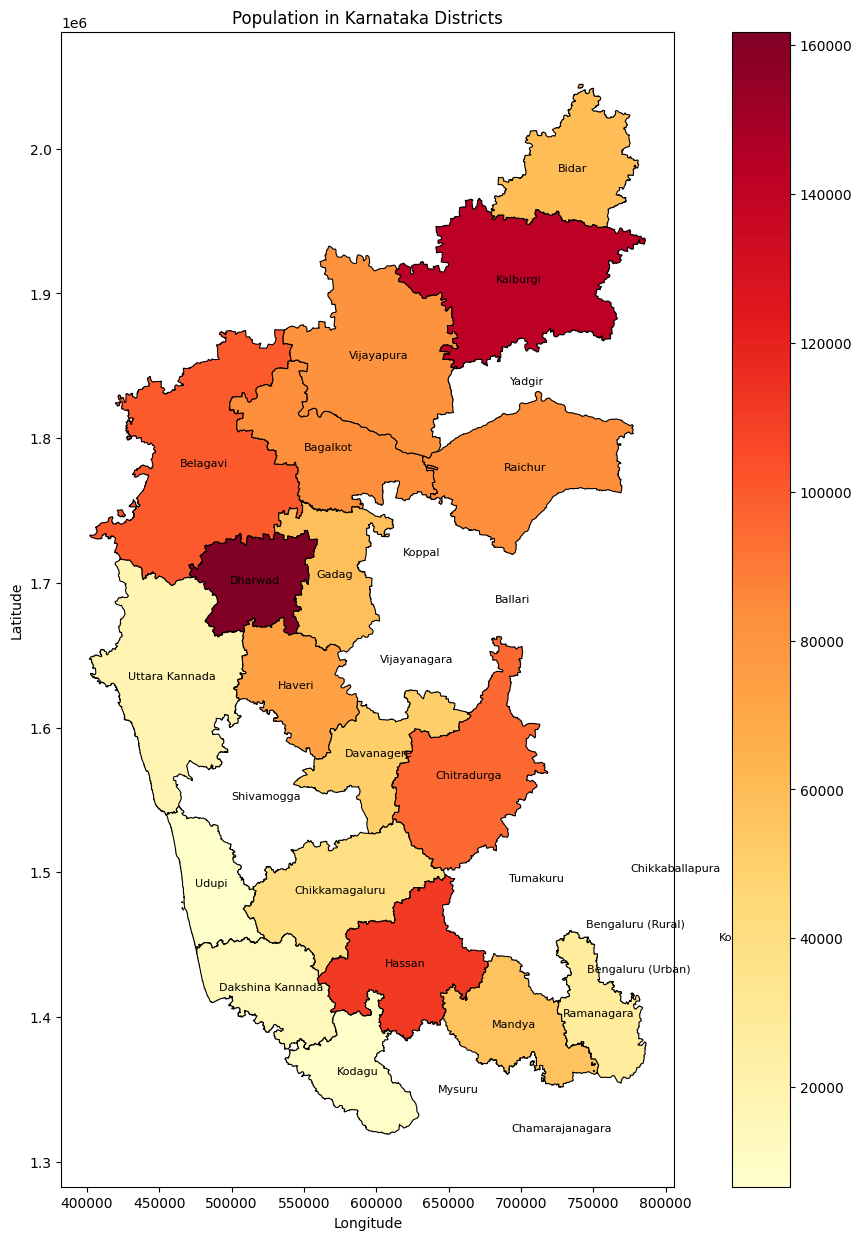

In [56]:
fig, ax = plt.subplots(figsize=(15, 15))
print(gdf_merged.geometry.centroid.x)
print(gdf_merged.geometry.centroid.y)

# Add district labels
for x, y, label in zip(gdf_merged.geometry.centroid.x, gdf_merged.geometry.centroid.y, gdf_merged['KGISDist_1']):
    ax.text(x, y, label, fontsize=8, ha='center', va='center')
gdf_district.plot(ax=ax, column=gdf_merged['population'], cmap=cmap, edgecolor='black', linewidth=0.8, legend=True)

# Set plot title and axis labels
ax.set_title('Population in Karnataka Districts')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

C:\Users\91702\AppData\Local\Temp\ipykernel_18024\2412975141.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('YlOrRd')  # Red to green colormap (reversed)
C:\Users\91702\AppData\Local\Temp\ipykernel_18024\2412975141.py:30: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(sm)


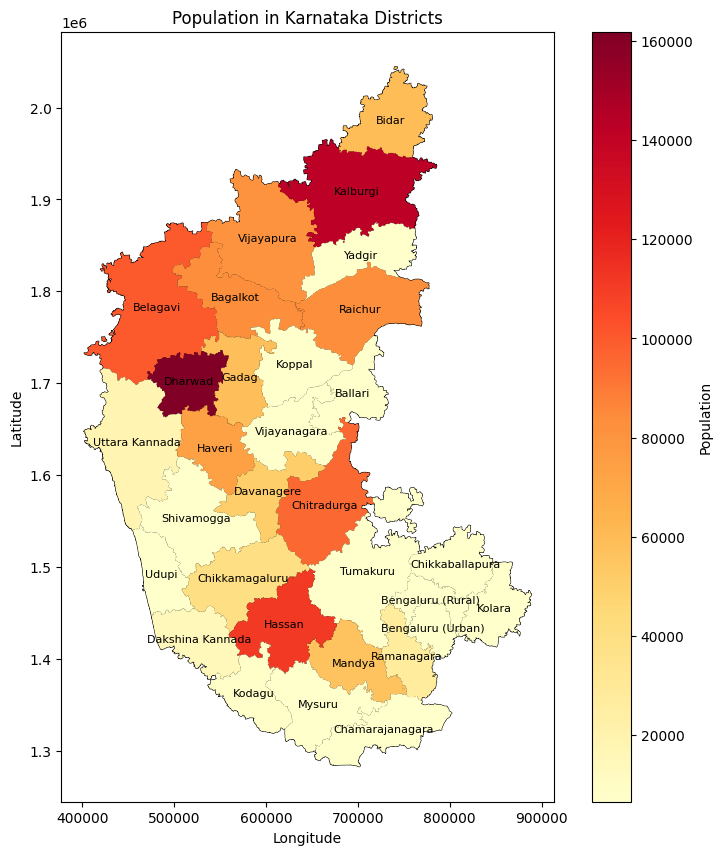

In [54]:
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np

# Define color scale
cmap = plt.cm.get_cmap('YlOrRd')  # Red to green colormap (reversed)
cmap.set_bad('white')  # Set NaN values to white
normalize = colors.Normalize(vmin=gdf_merged['population'].min(), vmax=gdf_merged['population'].max())

# Plot the map
fig, ax = plt.subplots(figsize=(10, 10))
gdf_district.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=0.8)  # Plot the district outlines

# Fill districts with color based on population values
infes_values = gdf_merged['population'].fillna(np.nanmin(gdf_merged['population']) - 1)  # Replace NaN values with a value lower than min
gdf_district.plot(ax=ax, column=infes_values, cmap=cmap, linewidth=0, legend=False)

# Add district labels
for x, y, label in zip(gdf_merged.geometry.centroid.x, gdf_merged.geometry.centroid.y, gdf_merged['KGISDist_1']):
    ax.text(x, y, label, fontsize=8, ha='center', va='center')

# Set plot title and axis labels
ax.set_title('Population in Karnataka Districts')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Create and add colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=normalize)
sm.set_array([])
cbar = fig.colorbar(sm)
cbar.set_label('Population')

# Show the plot
plt.show()